In [8]:
'''
Directly put the waterfall chart to powerpoint
'''

from win32com.client import Dispatch

# Create PowerPoint application object
powerpoint = Dispatch("PowerPoint.Application")

# Create a new one
presentation = powerpoint.Presentations.Add()

# Add a blank slide
slide = presentation.Slides.Add(1, 1)

# Insert the image into the slide
picture = slide.Shapes.AddPicture("D:\seaborn\images\waterfall.png", 0, 1, 100, 100)

# Save the presentation
presentation.SaveAs("D:\seaborn\output_ppt.pptx")

# Close PowerPoint
powerpoint.Quit()


In [15]:
'''
Directly write some content to PowerPoint
'''

import win32com.client

# Create a PowerPoint application object
powerpoint = win32com.client.Dispatch("PowerPoint.Application")

# Create a new presentation
presentation = powerpoint.Presentations.Add()

# Add a new slide to the presentation
slide = presentation.Slides.Add(1, 1) # 1 represents the slide layout (1 for title slide)

# Set the title of the slide
title_shape = slide.Shapes.Title
title_shape.TextFrame.TextRange.Text = "Slide 1"

# Add content to the slide
content_shape = slide.Shapes.Placeholders(2)  # 2 represents the content placeholder
content_shape.TextFrame.TextRange.Text = "This is the content of slide 1."

# Save the presentation to a file
presentation.SaveAs("output_ppt.pptx")

# Close the PowerPoint application
powerpoint.Quit()

In [17]:
'''
Directly put table chart to powerpoint
'''
import win32com.client

# Create a PowerPoint application object
powerpoint = win32com.client.Dispatch("PowerPoint.Application")

# Create a new presentation
presentation = powerpoint.Presentations.Add()

# Example table data
data = [
    ["", "FOOTPRINT MTM Model", "INITIAL SELECTION IDD", "FINAL SELECTION UDD", "VARIANCE MTM v UDD", "VARIANCE %"],
    ["Total SAM Cost $'000", "30", "32", "64", "23", "34"],
    ["Comprised of Build Costs", "56", "25", "89", "32", "76"],
    ["Materials", "35", "97", "12", "67", "65"]
]

# Add a new slide to the presentation with a title and content layout
slide = presentation.Slides.Add(1, 1)  # 1 represents the layout for title and content

# Set the title of the slide
title_shape = slide.Shapes.Title
title_shape.TextFrame.TextRange.Text = "Table Slide"

# Add a table to the slide
rows = len(data)
cols = len(data[0])
table_shape = slide.Shapes.AddTable(rows, cols, 100, 150, 500, 300)  # Adjust position and size as needed

# Populate the table with data
for i in range(rows):
    for j in range(cols):
        cell = table_shape.Table.Cell(i + 1, j + 1)
        cell.Shape.TextFrame.TextRange.Text = str(data[i][j])

# Save the presentation to a file
presentation.SaveAs("table_presentation.pptx")

# Close the PowerPoint application
powerpoint.Quit()


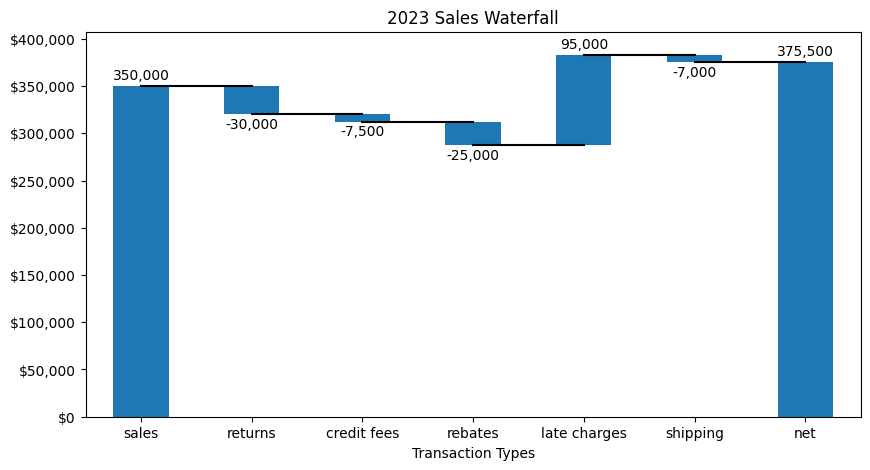

In [2]:
'''
Waterfall chart using python library
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#Use python syntax to format currency
def money(x, pos):
    'The two args are the value and tick position'
    return "${:,.0f}".format(x)
formatter = FuncFormatter(money)

#Data to plot. Do not include a total, it will be calculated
index = ['sales','returns','credit fees','rebates','late charges','shipping']
data = {'amount': [350000,-30000,-7500,-25000,95000,-7000]}

#Store data and create a blank series to use for the waterfall
trans = pd.DataFrame(data=data,index=index)
blank = trans.amount.cumsum().shift(1).fillna(0)

#Get the net total number for the final element in the waterfall
total = trans.sum().amount
trans.loc["net"]= total
blank.loc["net"] = total

#The steps graphically show the levels as well as used for label placement
step = blank.reset_index(drop=True).repeat(3).shift(-1)
step[1::3] = np.nan

#When plotting the last element, we want to show the full bar,
#Set the blank to 0
blank.loc["net"] = 0

#Plot and label
my_plot = trans.plot(kind='bar', stacked=True, bottom=blank,legend=None, figsize=(10, 5), title="2023 Sales Waterfall")
my_plot.plot(step.index, step.values,'k')
my_plot.set_xlabel("Transaction Types")

#Format the axis for dollars
my_plot.yaxis.set_major_formatter(formatter)

#Get the y-axis position for the labels
y_height = trans.amount.cumsum().shift(1).fillna(0)

#Get an offset so labels don't sit right on top of the bar
max = trans.max()
neg_offset = max / 25
pos_offset = max / 50
plot_offset = int(max / 15)

#Start label loop
loop = 0
for index, row in trans.iterrows():
    # For the last item in the list, we don't want to double count
    if row['amount'] == total:
        y = y_height[loop]
    else:
        y = y_height[loop] + row['amount']
    # Determine if we want a neg or pos offset
    if row['amount'] > 0:
        y += pos_offset
    else:
        y -= neg_offset
    my_plot.annotate("{:,.0f}".format(row['amount']),(loop,y),ha="center")
    loop+=1

#Scale up the y axis so there is room for the labels
my_plot.set_ylim(0,blank.max()+int(plot_offset))
#Rotate the labels
my_plot.set_xticklabels(trans.index,rotation=0)
my_plot.get_figure().savefig("waterfall.png",dpi=200,bbox_inches='tight')

In [3]:
'''
Directly put the waterfall chart to excel
'''
import openpyxl
from openpyxl.drawing.image import Image as ExcelImage
from pptx import Presentation
from pptx.util import Inches

# Sample image file path
image_path = 'waterfall.png'

# Excel
excel_file_path = 'output_excel.xlsx'
wb = openpyxl.Workbook()
ws = wb.active

# Insert image into Excel
img = ExcelImage(image_path)
ws.add_image(img, 'C3')

# Save Excel file
wb.save(excel_file_path)
